# TODO: Write theory here... 

(-1.0, 8.0)

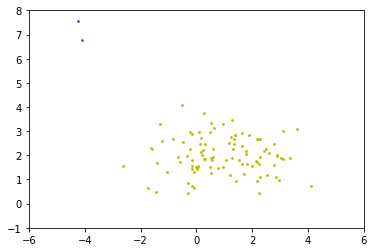

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data from one Gaussian distribution.
N = 100;
data_mu = [1, 2];
data_sig = [[2, 0], [0, 0.5]];
X = np.random.multivariate_normal(data_mu, data_sig, N)

# Generate few outliers.
N_outliers = 2;
outliers_mu = [-4, 7];
outliers_sig = [[0.2, 0], [0, 0.2]];
outliers = np.random.multivariate_normal(outliers_mu, outliers_sig, N_outliers);
x_plus_outliers = np.concatenate((X, outliers), axis=0);


plt.plot(outliers[:, 0], outliers[:, 1], 'bx', markersize = 1.8)
plt.plot(X[:, 0], X[:, 1], 'yo', markersize = 1.8)
plt.xlim(-6,6)
plt.ylim(-1,8)

In [2]:
from scipy import stats

def fit_mog(X, K, precision):
    lamda = np.ones((K, 1), dtype=float) / K

    # Initialize the values in mu to K randomly chosen unique datapoints.
    mu = np.random.permutation(X)[0:K,:]

    # Initialize the variances in sig to the variance of the dataset.
    sig = []
    I, dimensionality = X.shape
    dataset_mean = np.sum(X, axis=0) / I
    dataset_variance = np.zeros((dimensionality, dimensionality), dtype=float)
    for i in range(I):
        mat = (X[i,:] - dataset_mean)[np.newaxis]
        mat = mat.T @ mat
        dataset_variance = dataset_variance + mat

    dataset_variance = dataset_variance / I
        
    for i in range(K):
        sig.append(dataset_variance)
    
    # The main loop.
    iterations = 0
    previous_L = 1000000 #Just a random initialization
    
    while True:
        # Expectation step.
        l = np.zeros((I, K))
        r = np.zeros((I, K))
        
        # Compute the numerator of Bayes' rule.
        for k in range (K):
            l[:,k] = lamda[k] * stats.multivariate_normal.pdf(X, mu[k,:], sig[k])
            
        s = np.sum(l, axis=1)
        for i in range(I):
            r[i,:] = l[i,:] / s[i]
        # Maximization step.
        r_summed_rows = np.sum(r,axis=0)
        r_summed_all = np.sum(np.sum(r,axis=0), axis=0)
        for k in range(K):
            
            # Update lambda.
            lamda[k] = r_summed_rows[k] / r_summed_all       

            # Update mu
            new_mu = np.zeros((1,dimensionality), dtype=float)
            for i in range(I):
                new_mu = new_mu + r[i,k]*X[i,:]
                
            mu[k,:] = new_mu / r_summed_rows[k]
            # Update sigma.
            new_sigma = np.zeros((dimensionality,dimensionality), dtype=float)
            for i in range(I):
                mat = (X[i,:] - mu[k,:])[np.newaxis]
                mat = r[i,k] * mat.T @ mat
                new_sigma = new_sigma + mat                
            sig[k] = new_sigma / r_summed_rows[k]
        # Compute the log likelihood L.
        temp = np.zeros((I,K), dtype=float)
        
        for k in range(K):
            temp[:, k] = lamda[k] * stats.multivariate_normal.pdf(X, mu[k,:], sig[k])

        temp = np.sum(temp, axis=1)
        temp = np.log(temp)        
        L = np.sum(temp, axis=0)  
        iterations = iterations + 1
        if (abs(L - previous_L) < precision):
            break
        previous_L = L
    return lamda, mu, sig
lamda2, mu2, sig2 = fit_mog(X, 2, 0.02)
# Fit a Gaussian to the original data and to the data with outliers.
lamda1, mu1, sig1 = fit_mog (X, 1, 0.01)
lamda2, mu2, sig2 = fit_mog (x_plus_outliers, 1, 0.01)

In [3]:
def prepare_mog_model(lamda, mu, sig, n):
    # Compute the first Gaussian as a matrix.
    mog = 0
    K, _ = mu.shape
    for index in range(K):
        # Now combine the two Gaussians with the corresponding weights in lambda,
        # to obtain the final mixture of Gaussians.
        temp = stats.multivariate_normal.pdf(x_y_matrix, mu[index,:], sig[index])
        gaussian = temp.reshape(n, n)
        mog += lamda[index]*gaussian
    return mog

(-1.0, 9.0)

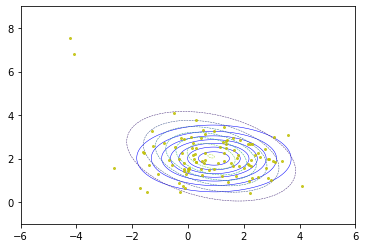

In [4]:
X_1_vals = np.arange(-10, 10, 0.01)
X_2_vals = np.arange(-10, 10, 0.01)
XX, YY = np.meshgrid(X_1_vals, X_2_vals)
size_ = XX.size
x = XX.reshape(size_,1)
y = YY.reshape(size_,1)
x_y_matrix = np.hstack((x,y))
n = len(XX)

mog1 = prepare_mog_model(lamda1, mu1, sig1, n)
mog2 = prepare_mog_model(lamda2, mu2, sig2, n)

# Create the contour plot.
plt.plot(x_plus_outliers[:, 0], x_plus_outliers[:, 1], 'yo', markersize = 2, alpha = .8)
plt.contour(XX,YY,mog1, colors=['b'], linewidths=0.5)
plt.contour(XX,YY,mog2, linestyles='dashed', corner_mask=False,linewidths=0.5, nchunk=0)
plt.xlim(-6,6)
plt.ylim(-1,9)


In [7]:
def fit_t(X, precision):
    I, D = X.shape
    # Initialize mu to the mean of the dataset.
    dataset_mean = np.sum(X, axis=1) / I
    mu = dataset_mean
    # Initialize sig to the covariance of the dataset.
    dataset_variance = np.zeros((D, D))
    x_minus_dataset_mean = X - dataset_mean
    for i in range(I):
        mat = x_minus_dataset_mean[i,:]
        mat = mat.T @ mat
        dataset_variance = dataset_variance + mat
    dataset_variance = dataset_variance / I
    sig = dataset_variance
    
    # Initialize degrees of freedom to 1000 (just a random large value).
    nu = 1000
    
    # The main loop.
    iterations = 0
    previous_L = 1000000 # just a random initialization
    delta = np.zeros((I,1))
    
    while true
    # Expectation step.
    # Compute delta.
    x_minus_mu = X - mu
    temp = x_minus_mu / sig
    for i in range(I):
        delta[i] = temp[i,:] @ x_minus_mu[i,:].T
    
